Reference

1. [Detailed Explanation and Python Implementation of Q-Learning Algorithm in OpenAI Gym (Cart-Pole)](https://www.youtube.com/watch?v=KMjQmG5Uzis)


### Basic Imports

https://www.gymlibrary.dev/environments/classic_control/mountain_car/

In [100]:
import matplotlib.pyplot as plt
import torch
import gymnasium as gym
import pandas as pd

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [101]:
env = gym.make('MountainCar-v0', render_mode='human')

In [102]:
env.reset(seed=42)
for i in range(100):
    env.render()
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    print(i, observation, reward, terminated, truncated, info)
    if terminated:
        break
    

0 [-0.4457913  -0.00058252] -1.0 False False {}
1 [-0.4469521  -0.00116079] -1.0 False False {}
2 [-0.44768268 -0.00073059] -1.0 False False {}
3 [-0.44997776 -0.00229505] -1.0 False False {}
4 [-0.45182046 -0.00184273] -1.0 False False {}
5 [-0.45419738 -0.00237692] -1.0 False False {}
6 [-0.45809108 -0.00389367] -1.0 False False {}
7 [-0.4614729  -0.00338183] -1.0 False False {}
8 [-0.46631798 -0.00484508] -1.0 False False {}
9 [-0.47159055 -0.00527257] -1.0 False False {}
10 [-0.4772516  -0.00566105] -1.0 False False {}
11 [-0.48425913 -0.00700754] -1.0 False False {}
12 [-0.49156103 -0.0073019 ] -1.0 False False {}
13 [-0.5001029  -0.00854181] -1.0 False False {}
14 [-0.5088207  -0.00871789] -1.0 False False {}
15 [-0.5166494  -0.00782869] -1.0 False False {}
16 [-0.52453023 -0.0078808 ] -1.0 False False {}
17 [-0.531404   -0.00687382] -1.0 False False {}
18 [-0.53721935 -0.00581528] -1.0 False False {}
19 [-0.54193246 -0.00471316] -1.0 False False {}
20 [-0.5465082  -0.00457572] -

In [103]:
nbins_pos = 3
nbins_vel = 3

pos_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], nbins_pos)
vel_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], nbins_vel)

In [104]:
pos_bins, vel_bins

(array([-1.20000005, -0.30000001,  0.60000002]), array([-0.07,  0.  ,  0.07]))

In [105]:
# Create a Q-table in pandas with multi-index
# index in the form of (pos, vel)
# columns are the actions
n_actions = env.action_space.n


# Create labels for bins with desired format
pos_labels = [f'{pos1:.2f} < pos < {pos2:.2f}' for pos1, pos2 in zip(pos_bins[:-1], pos_bins[1:])]
vel_labels = [f'{vel1:.2f} < vel < {vel2:.2f}' for vel1, vel2 in zip(vel_bins[:-1], vel_bins[1:])]

# Create MultiIndex for the Q-table
index = pd.MultiIndex.from_product([pos_labels, vel_labels], names=['pos', 'vel'])



columns = range(n_actions)

# Create Q-table with MultiIndex
q_table = pd.DataFrame(0, index=index, columns=columns)

In [106]:
q_table

0  1  2
pos                 vel                        
-1.20 < pos < -0.30 -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
-0.30 < pos < 0.60  -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0

In [107]:
pos_bins

array([-1.20000005, -0.30000001,  0.60000002])

In [108]:
# adding -inft to the first and +inft to the last bin
pos_bins = np.concatenate([[-np.inf], pos_bins, [np.inf]])
vel_bins = np.concatenate([[-np.inf], vel_bins, [np.inf]])

# Create labels for bins with desired format
pos_labels = [f'{pos1:.2f} < pos < {pos2:.2f}' for pos1, pos2 in zip(pos_bins[:-1], pos_bins[1:])]
vel_labels = [f'{vel1:.2f} < vel < {vel2:.2f}' for vel1, vel2 in zip(vel_bins[:-1], vel_bins[1:])]


# Create MultiIndex for the Q-table
index = pd.MultiIndex.from_product([pos_labels, vel_labels], names=['pos', 'vel'])



columns = range(n_actions)

# Create Q-table with MultiIndex
q_table = pd.DataFrame(0, index=index, columns=columns)

In [109]:
q_table

0  1  2
pos                 vel                        
-inf < pos < -1.20  -inf < vel < -0.07  0  0  0
                    -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
                    0.07 < vel < inf    0  0  0
-1.20 < pos < -0.30 -inf < vel < -0.07  0  0  0
                    -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
                    0.07 < vel < inf    0  0  0
-0.30 < pos < 0.60  -inf < vel < -0.07  0  0  0
                    -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
                    0.07 < vel < inf    0  0  0
0.60 < pos < inf    -inf < vel < -0.07  0  0  0
                    -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
                    0.07 < vel < inf    0  0  0

In [110]:
pos_bins[1:-1]

array([-1.20000005, -0.30000001,  0.60000002])

In [111]:
np.digitize([-1.3, -1.20, -1.1, 0.6, 5.0], pos_bins[1:-1])

array([0, 1, 1, 2, 3])

In [112]:
# Usually, we will create1a the multi-dim array in numpy

# Create a Q-table in numpy
q_table_np = np.arange(nbins_pos * nbins_vel * n_actions).reshape(nbins_pos, nbins_vel, n_actions)
print(q_table_np.shape)

(3, 3, 3)


In [113]:
q_table_np

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [114]:
def discretize_pos(pos):
    return np.digitize(pos, pos_bins[1:-1])

def discretize_vel(vel):
    return np.digitize(vel, vel_bins[1:-1])

from ipywidgets import interact

@interact(pos=(-1.3, 0.9, 0.01), vel=(-0.08, 0.09, 0.01))
def show_discretize(pos, vel):
    print(f"Position index {discretize_pos(pos)}, Velocity index {discretize_vel(vel)}, Value: {q_table_np[discretize_pos(pos), discretize_vel(vel)]}")


interactive(children=(FloatSlider(value=-0.19999999999999996, description='pos', max=0.9, min=-1.3, step=0.01)…

In [115]:
# Use untrained Q-table to play the game

observation,  _  = env.reset(seed=42)

for i in range(100):
    env.render()
    pos, vel = observation
    pos_idx = discretize_pos(pos)
    vel_idx = discretize_vel(vel)
    action = np.argmax(q_table_np[pos_idx, vel_idx])
    observation, reward, terminated, truncated, info = env.step(action)
    print(i, observation, reward, terminated, truncated, info, action)
    if terminated:
        break
    

0 [-4.4479132e-01  4.1747934e-04] -1.0 False False {} 2
1 [-0.4439594   0.00083191] -1.0 False False {} 2
2 [-0.4427191   0.00124029] -1.0 False False {} 2
3 [-0.4410795   0.00163962] -1.0 False False {} 2
4 [-0.43905246  0.00202703] -1.0 False False {} 2
5 [-0.43665275  0.00239971] -1.0 False False {} 2
6 [-0.43389776  0.00275498] -1.0 False False {} 2
7 [-0.43080744  0.00309032] -1.0 False False {} 2
8 [-0.4274041   0.00340333] -1.0 False False {} 2
9 [-0.42371225  0.00369185] -1.0 False False {} 2
10 [-0.4197584   0.00395386] -1.0 False False {} 2
11 [-0.41557083  0.00418759] -1.0 False False {} 2
12 [-0.41117933  0.00439149] -1.0 False False {} 2
13 [-0.40661508  0.00456424] -1.0 False False {} 2
14 [-0.40191033  0.00470476] -1.0 False False {} 2
15 [-0.3970981   0.00481224] -1.0 False False {} 2
16 [-0.392212    0.00488609] -1.0 False False {} 2
17 [-0.38728598  0.00492601] -1.0 False False {} 2
18 [-0.38235408  0.00493192] -1.0 False False {} 2
19 [-0.37745008  0.004904  ] -1.0 F

In [197]:
# Train the Q-table

# Hyperparameters
alpha = 0.2 # learning rate
gamma = 0.99 # discount factor

# Exploration settings
epsilon = 0.2 # exploration rate

# Number of episodes
n_episodes = 2000

# Number of steps per episode
n_steps = 300

# Create a Q-table in numpy
nbins_pos = 10
nbins_vel = 10

pos_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], nbins_pos)
vel_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], nbins_vel)

pos_bins = np.concatenate([[-np.inf], pos_bins, [np.inf]])
vel_bins = np.concatenate([[-np.inf], vel_bins, [np.inf]])

q_table_np = np.random.randn(nbins_pos, nbins_vel, n_actions)

def discretize_pos(pos):
    return np.digitize(pos, pos_bins[1:-1])

def discretize_vel(vel):
    return np.digitize(vel, vel_bins[1:-1])


    

In [198]:
# loop
# disable rendering
env = gym.make('MountainCar-v0', render_mode=None)
rewards = np.zeros(n_episodes)
for episode in range(n_episodes):
    epsilon = epsilon * 0.98
    if episode % 100 == 0:
        print(f"Episode {episode}")
    observation, _ = env.reset(seed=episode)
    cumulative_reward = 0
    for step in range(n_steps):
        # discretize the observation
        pos, vel = observation
        pos_idx = discretize_pos(pos)
        vel_idx = discretize_vel(vel)
        
        # select the action
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table_np[pos_idx, vel_idx])
        
        # take the action
        next_observation, reward, terminated, truncated, info = env.step(action)
        
        cumulative_reward += reward
        # discretize the next observation
        next_pos, next_vel = next_observation
        next_pos_idx = discretize_pos(next_pos)
        next_vel_idx = discretize_vel(next_vel)
        
        # update the q-table
        q_table_np[pos_idx, vel_idx, action] += alpha * (reward + gamma * np.max(q_table_np[next_pos_idx, next_vel_idx]) - q_table_np[pos_idx, vel_idx, action])
        
        observation = next_observation
        # rewards update
        rewards[episode] = cumulative_reward
        
        if terminated:
            print(f"Episode {episode} terminated after {step} steps")
            break

Episode 0
Episode 70 terminated after 287 steps
Episode 71 terminated after 283 steps
Episode 72 terminated after 222 steps
Episode 81 terminated after 241 steps
Episode 82 terminated after 243 steps
Episode 89 terminated after 263 steps
Episode 90 terminated after 167 steps
Episode 91 terminated after 230 steps
Episode 92 terminated after 171 steps
Episode 93 terminated after 160 steps
Episode 94 terminated after 238 steps
Episode 97 terminated after 241 steps
Episode 100
Episode 107 terminated after 230 steps
Episode 108 terminated after 247 steps
Episode 109 terminated after 141 steps
Episode 114 terminated after 254 steps
Episode 115 terminated after 250 steps
Episode 117 terminated after 296 steps
Episode 118 terminated after 156 steps
Episode 119 terminated after 158 steps
Episode 128 terminated after 260 steps
Episode 131 terminated after 226 steps
Episode 145 terminated after 248 steps
Episode 146 terminated after 243 steps
Episode 153 terminated after 268 steps
Episode 158 ter

In [191]:
q_table_np

array([[[ -0.18958972,   0.26967217,   1.38404402],
        [ -1.21668457,   0.05071674,   0.81052144],
        [ -0.02531154,  -1.45244815,   1.15031594],
        ...,
        [  0.87586982,  -1.08174015,   2.54202718],
        [ -0.0833869 ,   0.17426822,  -1.49677939],
        [  0.16780506,  -1.48997159,   0.21635009]],

       [[  0.31227615,  -0.46502689,  -1.02515437],
        [  0.01888872,   0.56352051,  -1.33668172],
        [ -4.71207878,  -1.68008836,  -2.59192937],
        ...,
        [  0.64431342,  -0.67860599,   0.13189681],
        [  0.63642826,  -0.04058059,  -1.20642178],
        [ -0.07449935,  -0.2964363 ,  -2.1150609 ]],

       [[ -1.6633468 ,  -0.15971921,   2.39901208],
        [ -0.62274969,   1.1048762 ,   1.47740083],
        [-15.39489637, -18.02683606, -14.99345303],
        ...,
        [ -1.09749341,   0.18570483,   0.60577152],
        [  0.75708305,  -1.05852288,   0.62633361],
        [ -2.27838034,  -0.62657887,   0.77179876]],

       ...,

      

In [199]:
reward

-1.0

In [200]:
q_table_np.max()

2.3023108044114435

<Axes: >

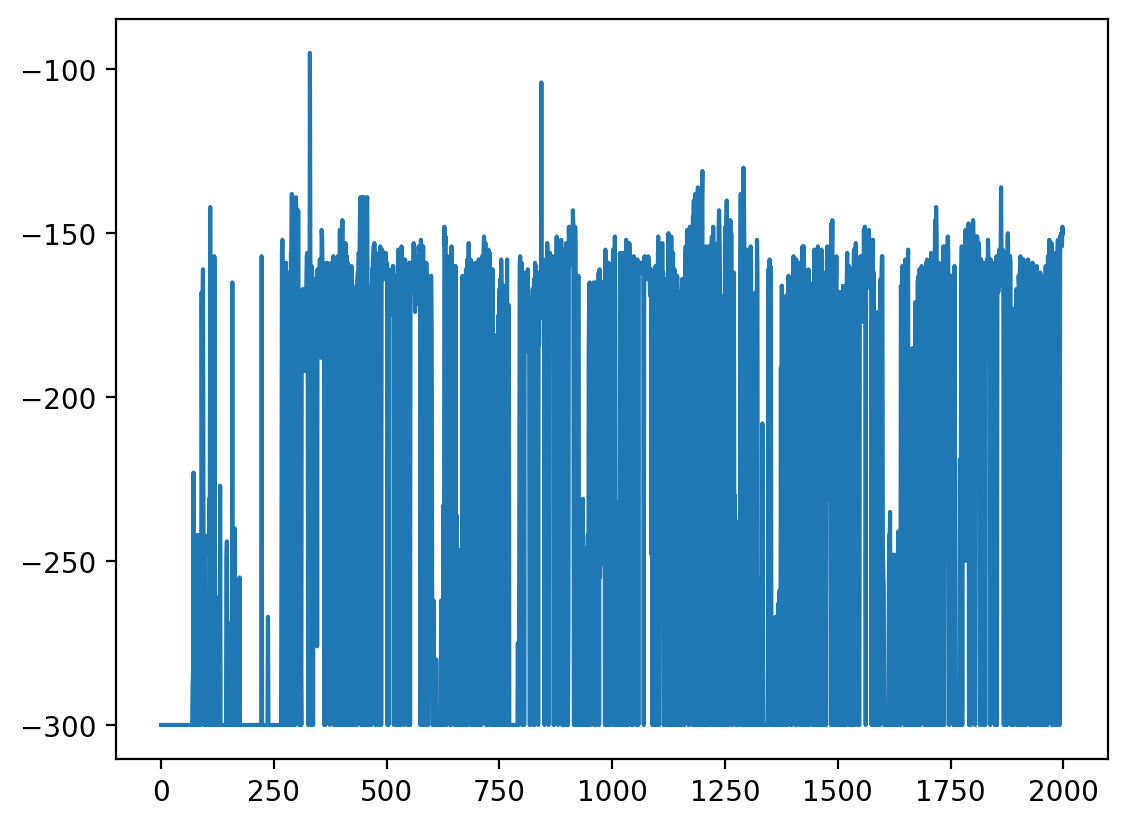

In [201]:
pd.Series(rewards).plot()

<Axes: >

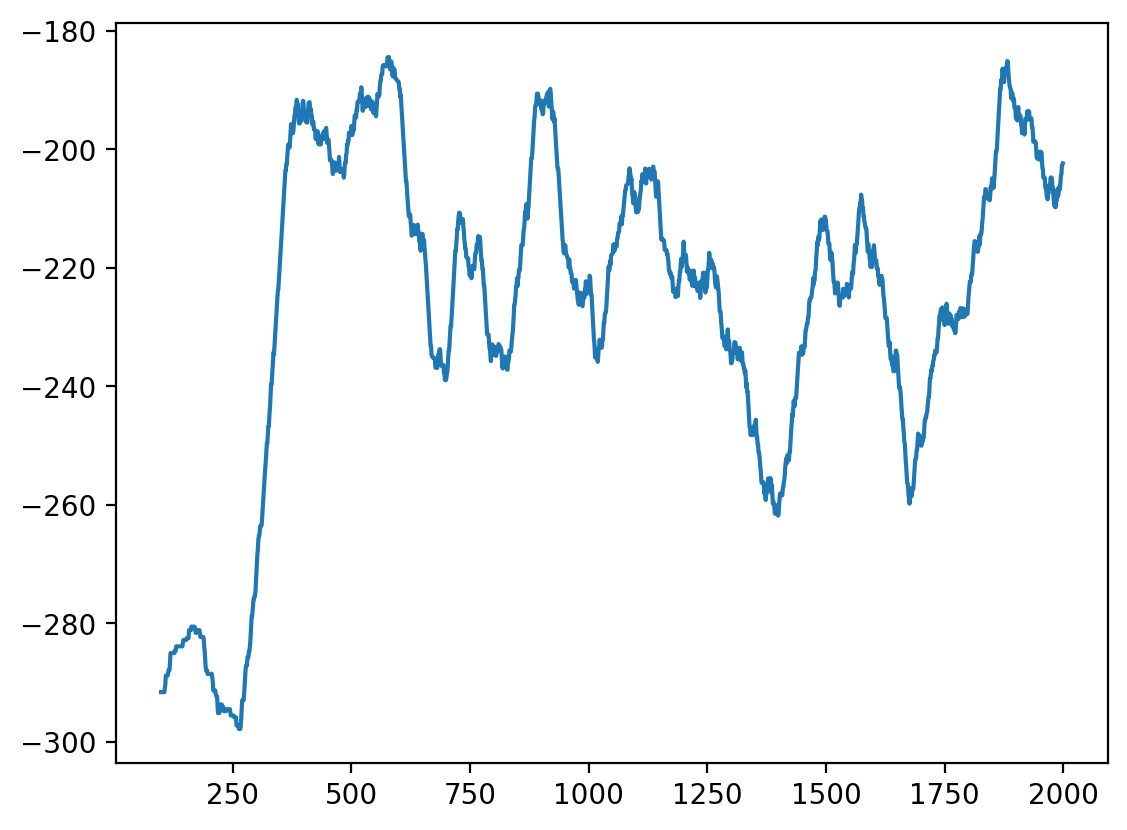

In [202]:
# plot smoothed rewards
pd.Series(rewards).rolling(100).mean().plot()

In [203]:
env = gym.make('MountainCar-v0', render_mode='human')
observation,  _  = env.reset(seed=42)

for i in range(300):
    env.render()
    pos, vel = observation
    pos_idx = discretize_pos(pos)
    vel_idx = discretize_vel(vel)
    action = np.argmax(q_table_np[pos_idx, vel_idx])
    observation, reward, terminated, truncated, info = env.step(action)
    print(i, observation, reward, terminated, truncated, info, action)
    if terminated:
        break

0 [-0.44679132 -0.00158252] -1.0 False False {} 0
1 [-0.4499448  -0.00315349] -1.0 False False {} 0
2 [-0.45464623 -0.00470141] -1.0 False False {} 0
3 [-0.4608611  -0.00621488] -1.0 False False {} 0
4 [-0.46854374 -0.00768264] -1.0 False False {} 0
5 [-0.4776374  -0.00909367] -1.0 False False {} 0
6 [-0.4880747  -0.01043729] -1.0 False False {} 0
7 [-0.4997779  -0.01170322] -1.0 False False {} 0
8 [-0.51265967 -0.01288173] -1.0 False False {} 0
9 [-0.52662337 -0.01396375] -1.0 False False {} 0
10 [-0.54156446 -0.01494107] -1.0 False False {} 0
11 [-0.55737084 -0.01580639] -1.0 False False {} 0
12 [-0.5739244  -0.01655353] -1.0 False False {} 0
13 [-0.59110194 -0.01717752] -1.0 False False {} 0
14 [-0.6087766 -0.0176747] -1.0 False False {} 0
15 [-0.62681943 -0.0180428 ] -1.0 False False {} 0
16 [-0.64510036 -0.01828096] -1.0 False False {} 0
17 [-0.6634901  -0.01838974] -1.0 False False {} 0
18 [-0.6818612  -0.01837108] -1.0 False False {} 0
19 [-0.7000894  -0.01822821] -1.0 False Fal

In [225]:
# Deep Q-learning

import torch

class QNetwork(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs, n_hidden=128):
        super(QNetwork, self).__init__()
        self.fc1 = torch.nn.Linear(n_inputs, n_hidden)
        self.fc2 = torch.nn.Linear(n_hidden, n_outputs)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
n_inputs = env.observation_space.shape[0]
n_outputs = env.action_space.n

q_network = QNetwork(n_inputs, n_outputs)

In [226]:
q_network

QNetwork(
  (fc1): Linear(in_features=2, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [227]:
with torch.no_grad():
    q_values = q_network(torch.tensor([0.1, 0.2], dtype=torch.float32))
    print(q_values)


tensor([-0.0311, -0.1063, -0.1612])


In [228]:
# Train the Q-network

# Hyperparameters
alpha = 0.2 # learning rate
gamma = 0.99 # discount factor

# Exploration settings
epsilon = 0.2 # exploration rate
eps_mult = 0.99

# Number of episodes
n_episodes = 2000

# Number of steps per episode
n_steps = 300



In [229]:
env = gym.make('MountainCar-v0', render_mode=None)

optimizer = torch.optim.Adam(q_network.parameters(), lr=alpha)

for episode in range(n_episodes):
    epsilon = epsilon * eps_mult
    if episode % 100 == 0:
        print(f"Episode {episode}")
    observation, _ = env.reset(seed=episode)
    cumulative_reward = 0
    for step in range(n_steps):
        # discretize the observation
        pos, vel = observation
        pos_idx = discretize_pos(pos)
        vel_idx = discretize_vel(vel)
        
        # select the action
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            q_values = q_network(torch.tensor([pos, vel], dtype=torch.float32))
            action = torch.argmax(q_values).item()
        
        # take the action
        next_observation, reward, terminated, truncated, info = env.step(action)
        
        cumulative_reward += reward
        # discretize the next observation
        next_pos, next_vel = next_observation
        next_pos_idx = discretize_pos(next_pos)
        next_vel_idx = discretize_vel(next_vel)
        
        # Compute Q-values for the next state
        with torch.no_grad():
            next_q_values = q_network(torch.tensor([next_pos, next_vel], dtype=torch.float32))
            max_next_q_value = torch.max(next_q_values).item()
        
        target_q_value = reward + gamma * max_next_q_value
        
        # Compute loss and update Q-network
        q_value = q_network(torch.tensor([pos, vel], dtype=torch.float32))[action]
        loss = torch.nn.functional.mse_loss(q_value, torch.tensor(target_q_value, dtype=torch.float32))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        observation = next_observation
        # rewards update
        rewards[episode] = cumulative_reward

        
        if terminated:
            print(f"Episode {episode} terminated after {step} steps")
            break

Episode 0
Episode 13 terminated after 231 steps
Episode 20 terminated after 183 steps
Episode 44 terminated after 277 steps
Episode 56 terminated after 244 steps
Episode 100
Episode 106 terminated after 175 steps
Episode 107 terminated after 211 steps
Episode 113 terminated after 168 steps
Episode 114 terminated after 277 steps
Episode 117 terminated after 152 steps
Episode 118 terminated after 234 steps
Episode 130 terminated after 233 steps
Episode 133 terminated after 229 steps
Episode 200
Episode 300
Episode 400
Episode 500
Episode 600


KeyboardInterrupt: 

<Axes: >

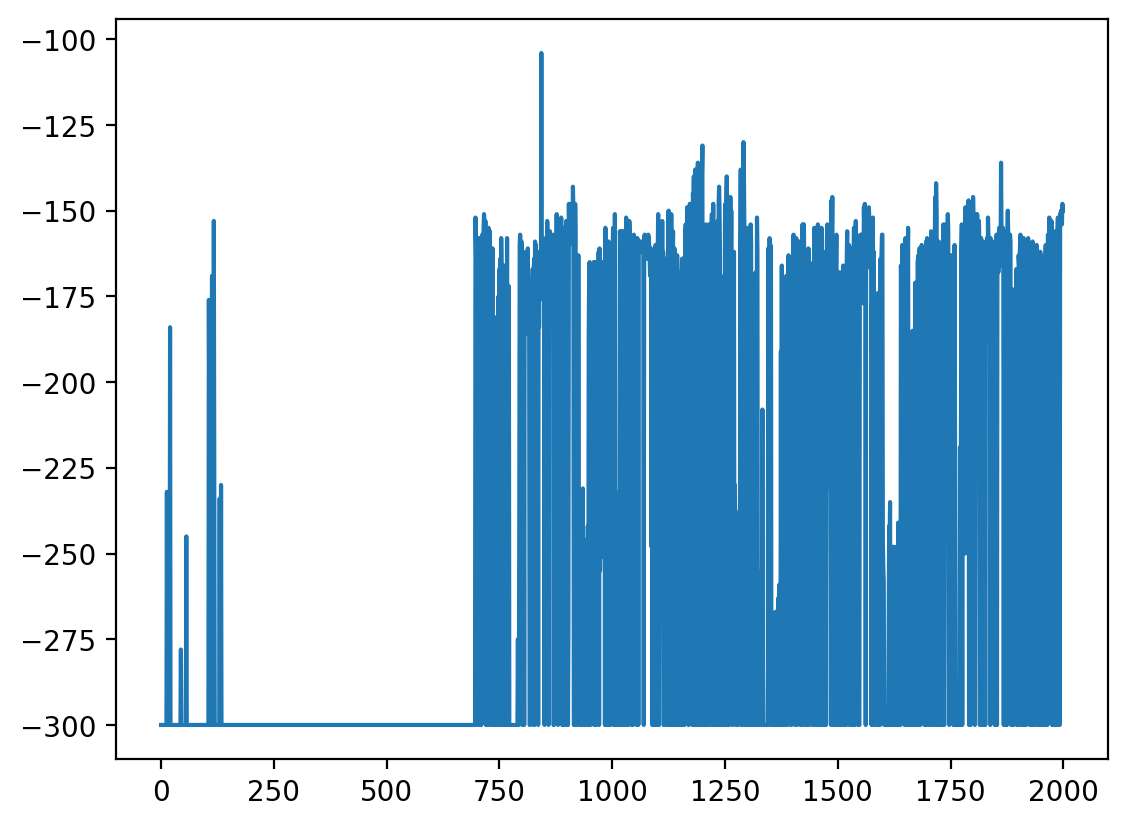

In [230]:
pd.Series(rewards).plot()